# **Azure Machine Learning + Azure DevOps Stack:**

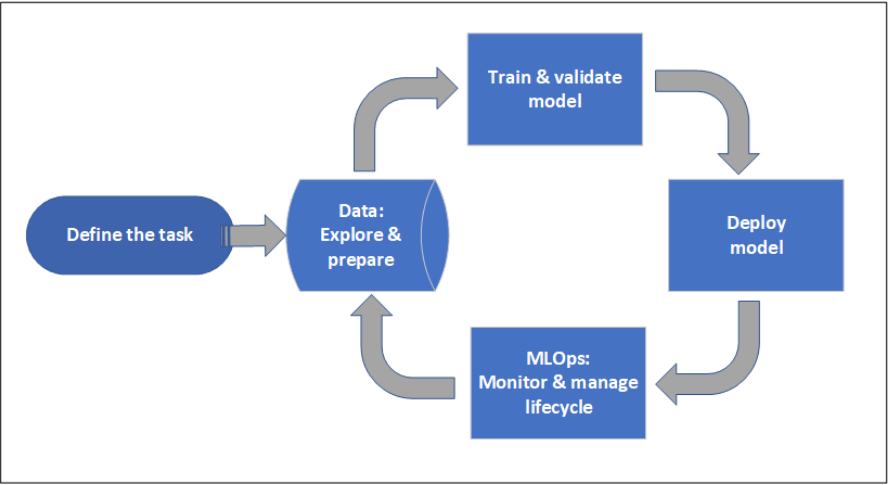

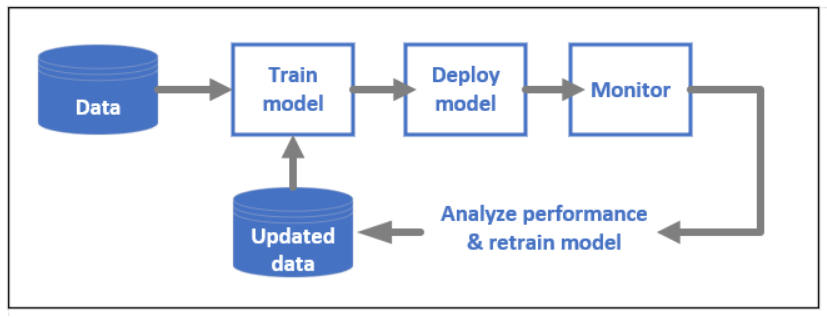

# How to create a workspace and compute instance in Azure Machine Learning studio:

***Creating Workspace:***

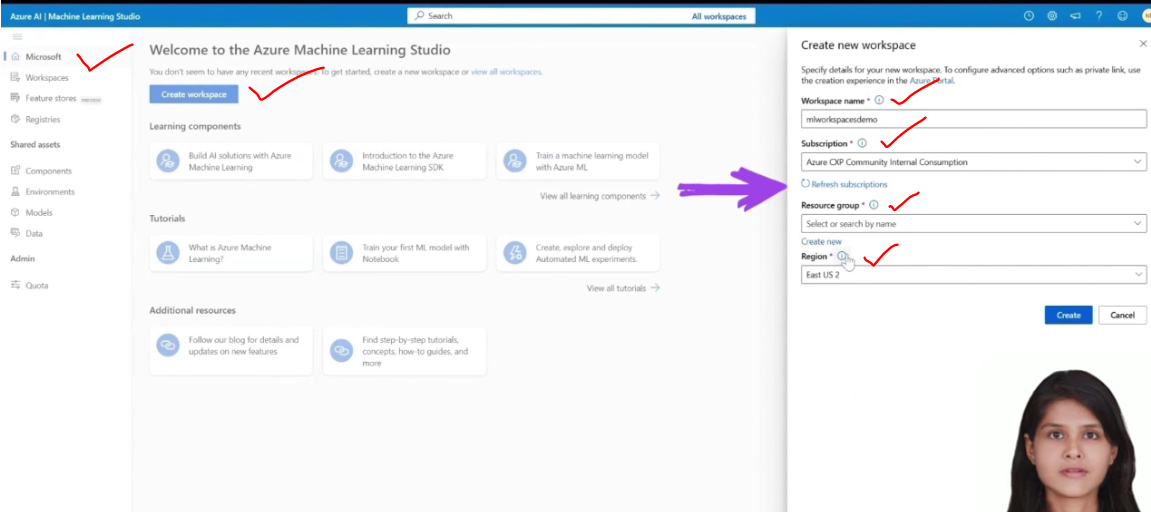

**inputs: workspace name ,Subscription, Resource Group, Region (we get these from the company)**

***Creating Compute Instance:***

Once the New Workspace got create to create compute instance open the newly created workspace and then click on *Notebooks*

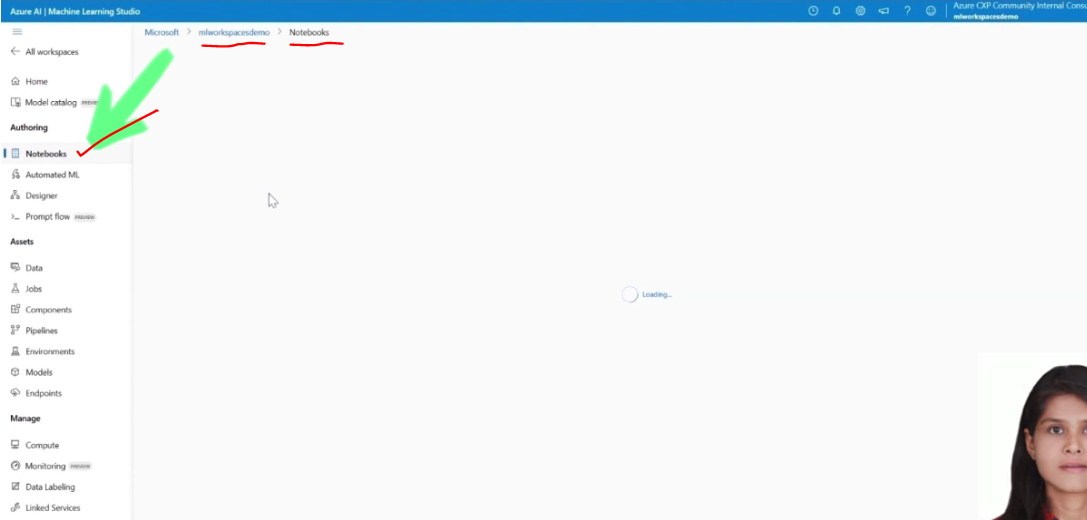

And then click on *Create Compute*

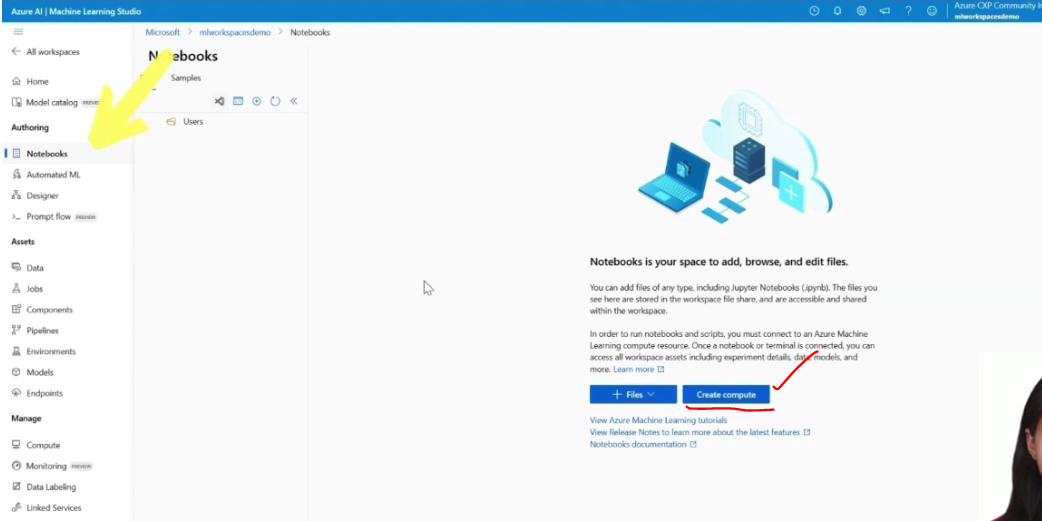

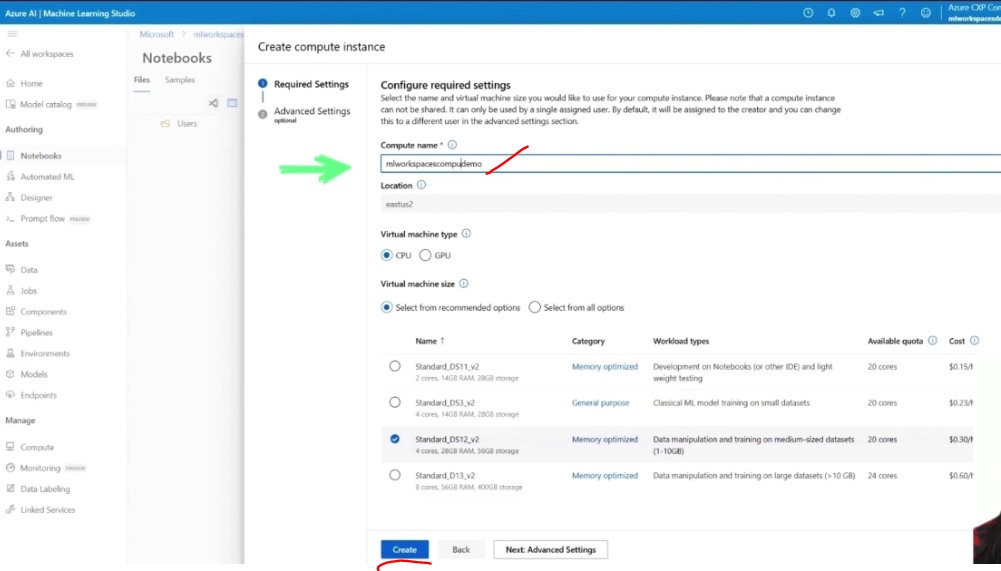

**Input: Compute Name**

Now after Compute Instance Creation to create a new notebook

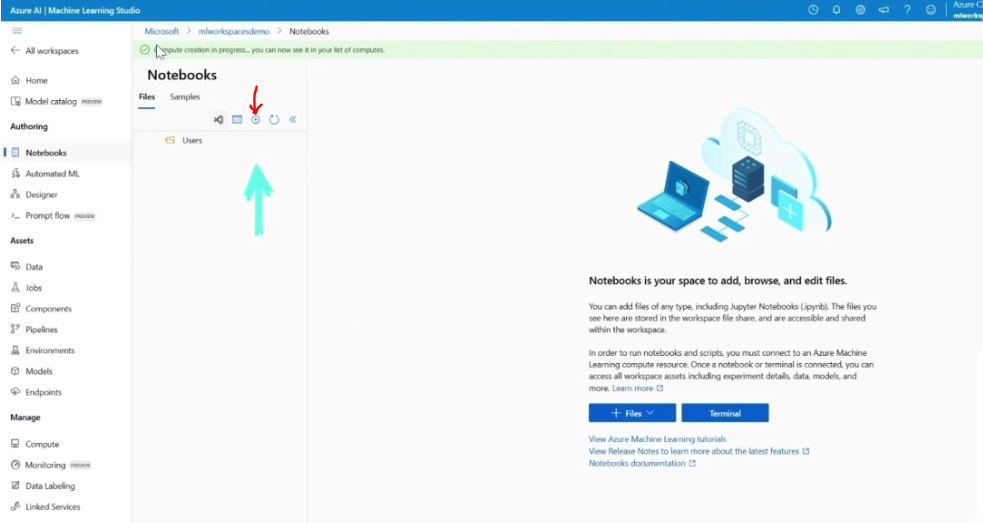

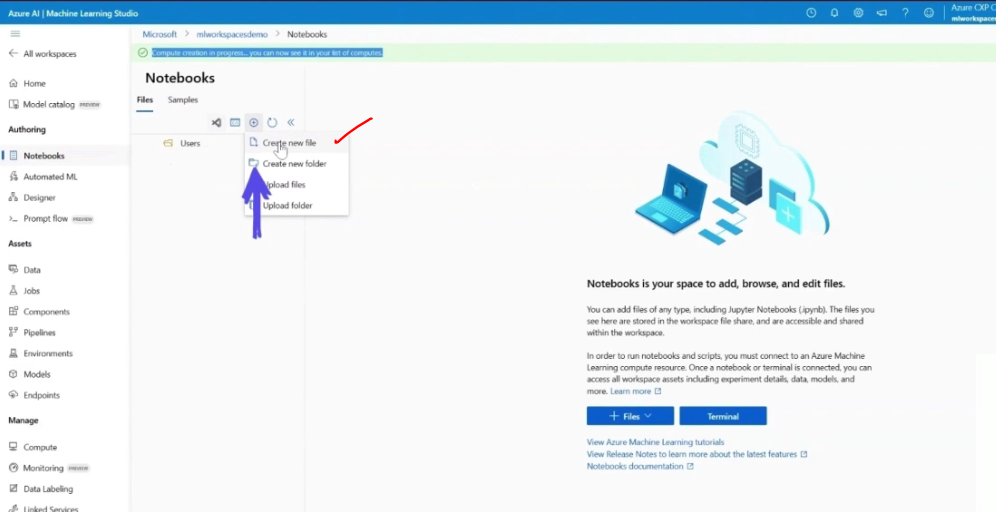

# Overview of Workspace:

Review the parts of the studio on the left-hand navigation bar:

The Authoring section of the studio contains multiple ways to get started in creating machine learning models. You can:

Notebooks section allows you to create Jupyter Notebooks, copy sample notebooks, and run notebooks and Python scripts.

Automated ML steps you through creating a machine learning model without writing code.

Designer gives you a drag-and-drop way to build models using prebuilt components.

The Assets section of the studio helps you keep track of the assets you create as you run your jobs. If you have a new workspace, there's nothing in any of these sections yet.

The Manage section of the studio lets you create and manage compute and external services you link to your workspace. It's also where you can create and manage a Data labeling project.

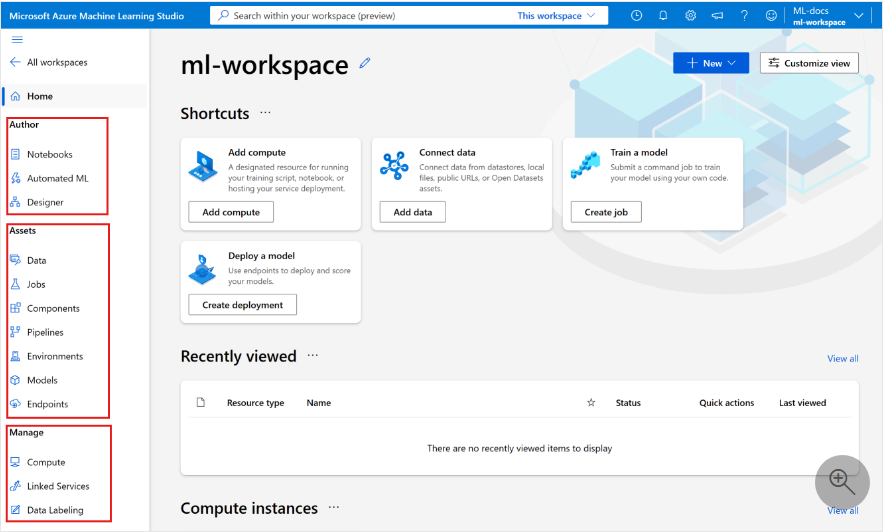

# Set up a Python development environment for Azure Machine Learning:

https://learn.microsoft.com/en-us/azure/machine-learning/how-to-configure-environment?view=azureml-api-2#data-science-virtual-machine

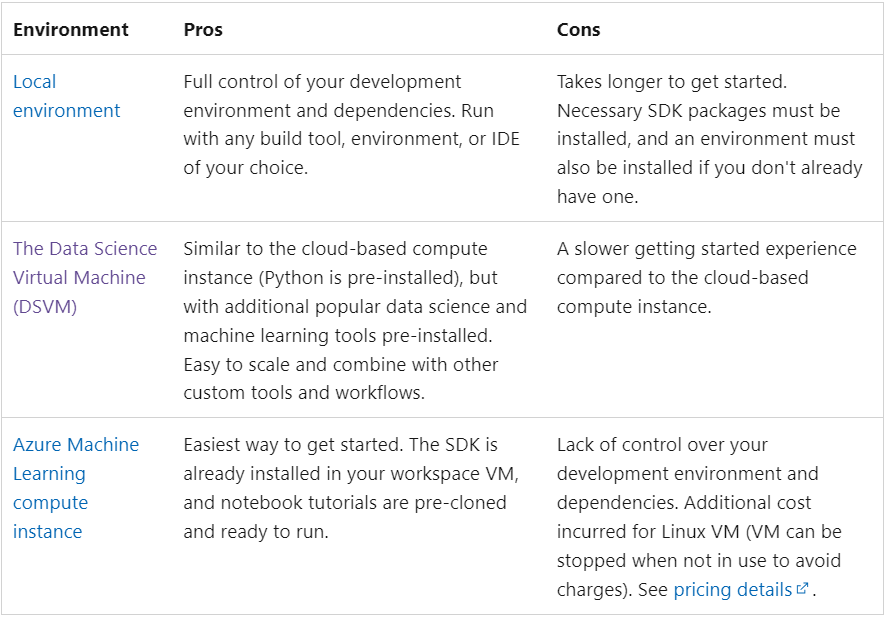

***Local and DSVM only: Create a workspace configuration file:***

The workspace configuration file is a JSON file that tells the SDK how to communicate with your Azure Machine Learning workspace. The file is named *config.json*

In [ ]:
{
    "subscription_id": "<subscription-id>",
    "resource_group": "<resource-group>",
    "workspace_name": "<workspace-name>"
}

This JSON file must be in the directory structure that contains your Python scripts or Jupyter Notebooks. It can be in the same directory, a subdirectory named.azureml*, or in a parent directory.

To use this file from your code, use the MLClient.**from_config** method. This code loads the information from the file and connects to your workspace.

Returns a client from an existing Azure Machine Learning Workspace using a file configuration.

This method provides a simple way to reuse the same workspace across multiple Python notebooks or projects. You can save a workspace's Azure Resource Manager (ARM) properties in a JSON configuration file using this format:

In [ ]:
{
       "subscription_id": "<subscription-id>",
       "resource_group": "<resource-group>",
       "workspace_name": "<workspace-name>"
   }

Then, you can use this method to load the same workspace in different Python notebooks or projects without retyping the workspace ARM properties.

In [ ]:
from_config(credential: TokenCredential, *, path: PathLike | str | None = None, file_name=None, **kwargs) -> MLClient

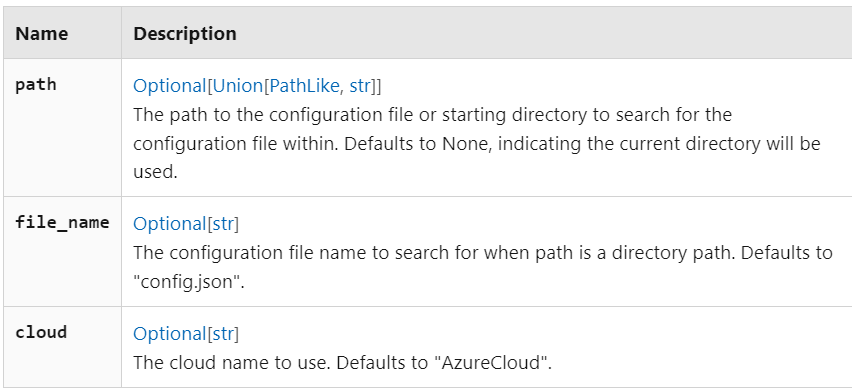

**This Return/Output:**

MLClient  The client for an existing Azure ML Workspace.

Exception that we get

ValidationException
Raised if "config.json", or file_name if overridden, cannot be found in directory. Details will be provided in the error message.

**Example:**

Creating an MLClient from a file named "config.json" in directory "src".

In [ ]:
from azure.ai.ml import MLClient

   client = MLClient.from_config(credential=DefaultAzureCredential(), path="./sdk/ml/azure-ai-ml/samples/src")

Creating an MLClient from a file named "team_workspace_configuration.json" in the current directory.

In [ ]:
from azure.ai.ml import MLClient

   client = MLClient.from_config(
       credential=DefaultAzureCredential(),
       file_name="./sdk/ml/azure-ai-ml/samples/team_workspace_configuration.json",
   )

We can even create workspace configuration file either by

1. Azure Machine Learning Studio

2. Azure Machine Learning Python SDK

**Using Azure Machine Learning Studio:**

Download the file:

Sign in to Azure Machine Learning studio

In the upper right Azure Machine Learning studio toolbar, select your workspace name.

Select the Download config file link.

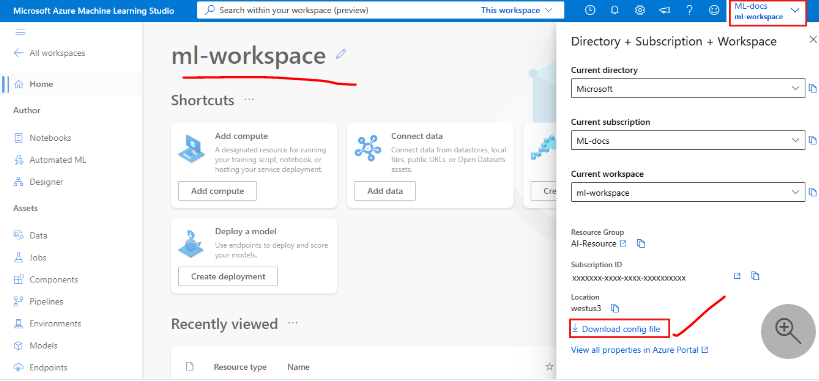

**Using Azure Machine Learning Python SDK:**

Azure Machine Learning Python SDK

Create a script to connect to your Azure Machine Learning workspace. Make sure to replace *subscription_id,resource_group, and workspace_name* with your own.

In [ ]:
#import required libraries
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

#Enter details of your Azure Machine Learning workspace
subscription_id = '<SUBSCRIPTION_ID>'
resource_group = '<RESOURCE_GROUP>'
workspace = '<AZUREML_WORKSPACE_NAME>'

#connect to the workspace
ml_client = MLClient(DefaultAzureCredential(), subscription_id, resource_group, workspace)

***Data Science Virtual Machine***

The Data Science VM is a customized virtual machine (VM) image you can use as a development environment. It's designed for data science work that's pre-configured tools and software like:

**To use the Data Science VM as a development environment:**

1. Create a Data Science VM using one of the following methods:

    1. Use the Azure portal to create an Ubuntu or Windows DSVM.

    2. Create a Data Science VM using ARM templates.

    3. Use the Azure CLI



1. Use the Azure portal to create an Ubuntu or Windows DSVM.

https://learn.microsoft.com/en-us/azure/machine-learning/data-science-virtual-machine/provision-vm?view=azureml-api-2


2. Create a Data Science VM using ARM templates.

how to create an Ubuntu Data Science Virtual Machine (DSVM) using an Azure Resource Manager template (ARM template).

https://learn.microsoft.com/en-us/azure/machine-learning/data-science-virtual-machine/dsvm-tutorial-resource-manager?view=azureml-api-2

We need to Create a .json template file

In [ ]:
{
  "$schema": "https://schema.management.azure.com/schemas/2019-04-01/deploymentTemplate.json#",
  "contentVersion": "1.0.0.0",
  "metadata": {
    "_generator": {
      "name": "bicep",
      "version": "0.8.9.13224",
      "templateHash": "4895680407304578048"
    }
  },
  "parameters": {
    "adminUsername": {
      "type": "string",
      "metadata": {
        "description": "Username for Administrator Account"
      }
    },
    "vmName": {
      "type": "string",
      "defaultValue": "vmName",
      "metadata": {
        "description": "The name of you Virtual Machine."
      }
    },
    "location": {
      "type": "string",
      "defaultValue": "[resourceGroup().location]",
      "metadata": {
        "description": "Location for all resources."
      }
    },
    "cpu_gpu": {
      "type": "string",
      "defaultValue": "CPU-4GB",
      "allowedValues": [
        "CPU-4GB",
        "CPU-7GB",
        "CPU-8GB",
        "CPU-14GB",
        "CPU-16GB",
        "GPU-56GB"
      ],
      "metadata": {
        "description": "Choose between CPU or GPU processing"
      }
    },
    "virtualNetworkName": {
      "type": "string",
      "defaultValue": "vNet",
      "metadata": {
        "description": "Name of the VNET"
      }
    },
    "subnetName": {
      "type": "string",
      "defaultValue": "subnet",
      "metadata": {
        "description": "Name of the subnet in the virtual network"
      }
    },
    "networkSecurityGroupName": {
      "type": "string",
      "defaultValue": "SecGroupNet",
      "metadata": {
        "description": "Name of the Network Security Group"
      }
    },
    "authenticationType": {
      "type": "string",
      "defaultValue": "sshPublicKey",
      "allowedValues": [
        "sshPublicKey",
        "password"
      ],
      "metadata": {
        "description": "Type of authentication to use on the Virtual Machine. SSH key is recommended."
      }
    },
    "adminPasswordOrKey": {
      "type": "secureString",
      "metadata": {
        "description": "SSH Key or password for the Virtual Machine. SSH key is recommended."
      }
    }
  },
  "variables": {
    "networkInterfaceName": "[format('{0}NetInt', parameters('vmName'))]",
    "virtualMachineName": "[parameters('vmName')]",
    "publicIpAddressName": "[format('{0}PublicIP', parameters('vmName'))]",
    "subnetRef": "[resourceId('Microsoft.Network/virtualNetworks/subnets', parameters('virtualNetworkName'), parameters('subnetName'))]",
    "nsgId": "[resourceId('Microsoft.Network/networkSecurityGroups', parameters('networkSecurityGroupName'))]",
    "osDiskType": "StandardSSD_LRS",
    "storageAccountName": "[format('storage{0}', uniqueString(resourceGroup().id))]",
    "storageAccountType": "Standard_LRS",
    "storageAccountKind": "Storage",
    "vmSize": {
      "CPU-4GB": "Standard_B2s",
      "CPU-7GB": "Standard_D2s_v3",
      "CPU-8GB": "Standard_D2s_v3",
      "CPU-14GB": "Standard_D4s_v3",
      "CPU-16GB": "Standard_D4s_v3",
      "GPU-56GB": "Standard_NC6_Promo"
    },
    "linuxConfiguration": {
      "disablePasswordAuthentication": true,
      "ssh": {
        "publicKeys": [
          {
            "path": "[format('/home/{0}/.ssh/authorized_keys', parameters('adminUsername'))]",
            "keyData": "[parameters('adminPasswordOrKey')]"
          }
        ]
      }
    }
  },
  "resources": [
    {
      "type": "Microsoft.Network/networkInterfaces",
      "apiVersion": "2021-05-01",
      "name": "[variables('networkInterfaceName')]",
      "location": "[parameters('location')]",
      "properties": {
        "ipConfigurations": [
          {
            "name": "ipconfig1",
            "properties": {
              "subnet": {
                "id": "[variables('subnetRef')]"
              },
              "privateIPAllocationMethod": "Dynamic",
              "publicIPAddress": {
                "id": "[resourceId('Microsoft.Network/publicIPAddresses', variables('publicIpAddressName'))]"
              }
            }
          }
        ],
        "networkSecurityGroup": {
          "id": "[variables('nsgId')]"
        }
      },
      "dependsOn": [
        "[resourceId('Microsoft.Network/networkSecurityGroups', parameters('networkSecurityGroupName'))]",
        "[resourceId('Microsoft.Network/publicIPAddresses', variables('publicIpAddressName'))]",
        "[resourceId('Microsoft.Network/virtualNetworks', parameters('virtualNetworkName'))]"
      ]
    },
    {
      "type": "Microsoft.Network/networkSecurityGroups",
      "apiVersion": "2021-05-01",
      "name": "[parameters('networkSecurityGroupName')]",
      "location": "[parameters('location')]",
      "properties": {
        "securityRules": [
          {
            "name": "JupyterHub",
            "properties": {
              "priority": 1010,
              "protocol": "Tcp",
              "access": "Allow",
              "direction": "Inbound",
              "sourceAddressPrefix": "*",
              "sourcePortRange": "*",
              "destinationAddressPrefix": "*",
              "destinationPortRange": "8000"
            }
          },
          {
            "name": "RStudioServer",
            "properties": {
              "priority": 1020,
              "protocol": "Tcp",
              "access": "Allow",
              "direction": "Inbound",
              "sourceAddressPrefix": "*",
              "sourcePortRange": "*",
              "destinationAddressPrefix": "*",
              "destinationPortRange": "8787"
            }
          },
          {
            "name": "SSH",
            "properties": {
              "priority": 1030,
              "protocol": "Tcp",
              "access": "Allow",
              "direction": "Inbound",
              "sourceAddressPrefix": "*",
              "sourcePortRange": "*",
              "destinationAddressPrefix": "*",
              "destinationPortRange": "22"
            }
          }
        ]
      }
    },
    {
      "type": "Microsoft.Network/virtualNetworks",
      "apiVersion": "2021-05-01",
      "name": "[parameters('virtualNetworkName')]",
      "location": "[parameters('location')]",
      "properties": {
        "addressSpace": {
          "addressPrefixes": [
            "10.0.0.0/24"
          ]
        },
        "subnets": [
          {
            "name": "[parameters('subnetName')]",
            "properties": {
              "addressPrefix": "10.0.0.0/24",
              "privateEndpointNetworkPolicies": "Enabled",
              "privateLinkServiceNetworkPolicies": "Enabled"
            }
          }
        ]
      }
    },
    {
      "type": "Microsoft.Network/publicIPAddresses",
      "apiVersion": "2021-05-01",
      "name": "[variables('publicIpAddressName')]",
      "location": "[parameters('location')]",
      "sku": {
        "name": "Basic",
        "tier": "Regional"
      },
      "properties": {
        "publicIPAllocationMethod": "Dynamic"
      }
    },
    {
      "type": "Microsoft.Storage/storageAccounts",
      "apiVersion": "2021-08-01",
      "name": "[variables('storageAccountName')]",
      "location": "[parameters('location')]",
      "sku": {
        "name": "[variables('storageAccountType')]"
      },
      "kind": "[variables('storageAccountKind')]"
    },
    {
      "type": "Microsoft.Compute/virtualMachines",
      "apiVersion": "2021-11-01",
      "name": "[format('{0}-{1}', variables('virtualMachineName'), parameters('cpu_gpu'))]",
      "location": "[parameters('location')]",
      "properties": {
        "hardwareProfile": {
          "vmSize": "[variables('vmSize')[parameters('cpu_gpu')]]"
        },
        "storageProfile": {
          "osDisk": {
            "createOption": "FromImage",
            "managedDisk": {
              "storageAccountType": "[variables('osDiskType')]"
            }
          },
          "imageReference": {
            "publisher": "microsoft-dsvm",
            "offer": "ubuntu-1804",
            "sku": "1804-gen2",
            "version": "latest"
          }
        },
        "networkProfile": {
          "networkInterfaces": [
            {
              "id": "[resourceId('Microsoft.Network/networkInterfaces', variables('networkInterfaceName'))]"
            }
          ]
        },
        "osProfile": {
          "computerName": "[variables('virtualMachineName')]",
          "adminUsername": "[parameters('adminUsername')]",
          "adminPassword": "[parameters('adminPasswordOrKey')]",
          "linuxConfiguration": "[if(equals(parameters('authenticationType'), 'password'), json('null'), variables('linuxConfiguration'))]"
        }
      },
      "dependsOn": [
        "[resourceId('Microsoft.Network/networkInterfaces', variables('networkInterfaceName'))]"
      ]
    }
  ],
  "outputs": {
    "adminUsername": {
      "type": "string",
      "value": "[parameters('adminUsername')]"
    }
  }
}

And then to use this template and deploy the template we go for Azure CLI

In [ ]:
read -p "Enter the name of the resource group to create:" resourceGroupName &&
read -p "Enter the Azure location (e.g., centralus):" location &&
read -p "Enter the authentication type (must be 'password' or 'sshPublicKey') :" authenticationType &&
read -p "Enter the login name for the administrator account (may not be 'admin'):" adminUsername &&
read -p "Enter administrator account secure string (value of password or ssh public key):" adminPasswordOrKey &&
templateUri="https://raw.githubusercontent.com/Azure/azure-quickstart-templates/master/application-workloads/datascience/vm-ubuntu-DSVM-GPU-or-CPU/azuredeploy.json" &&
az group create --name $resourceGroupName --location "$location" &&
az deployment group create --resource-group $resourceGroupName --template-uri $templateUri --parameters adminUsername=$adminUsername authenticationType=$authenticationType adminPasswordOrKey=$adminPasswordOrKey &&
echo "Press [ENTER] to continue ..." &&
read

When you run this code, enter:

1. The name of the resource group to contain the DSVM and associated resources that you'd like to create

2. The Azure location where you want to make the deployment

3. The authentication type you want to use (enter the string password or sshPublicKey)

4. The login name of the administrator account (this value might not be admin)

5. The value of the password or ssh public key for the account

Once we do this Sources will be deployed  and then to review them,

To display your Data Science Virtual Machine:

1. Go to the Azure portal
2. Sign in
3. Choose the resource group you just created

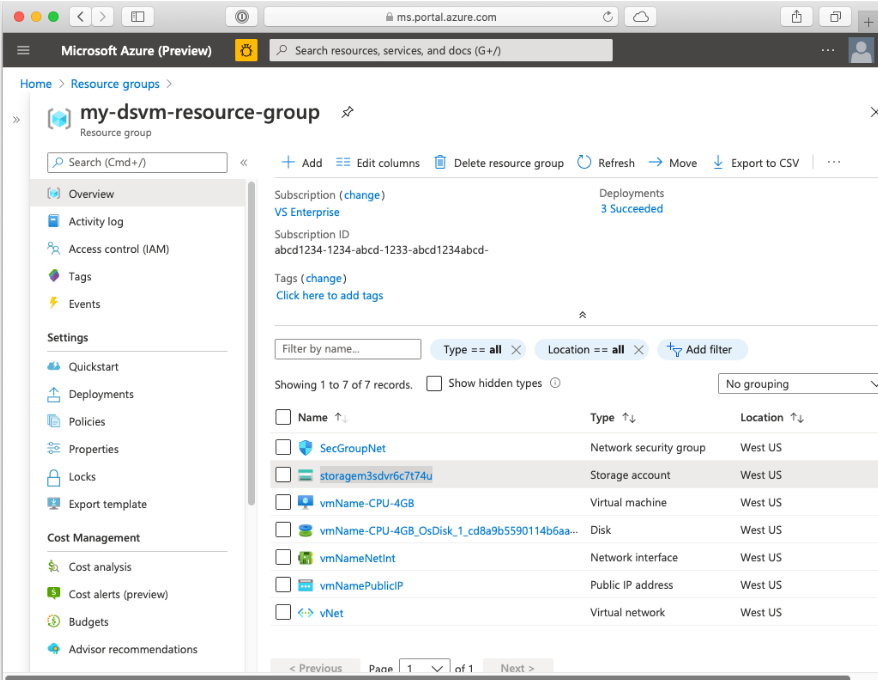

3. Creating Data Science Virtual Machine Using the Azure CLI

To create an Ubuntu Data Science VM, use the following command:

In [ ]:
# create a Ubuntu Data Science VM in your resource group
# note you need to be at least a contributor to the resource group in order to execute this command successfully
# If you need to create a new resource group use: "az group create --name YOUR-RESOURCE-GROUP-NAME --location YOUR-REGION (For example: westus2)"
az vm create --resource-group YOUR-RESOURCE-GROUP-NAME --name YOUR-VM-NAME --image microsoft-dsvm:linux-data-science-vm-ubuntu:linuxdsvmubuntu:latest --admin-username YOUR-USERNAME --admin-password YOUR-PASSWORD --generate-ssh-keys --authentication-type password

To create a Windows DSVM, use the following command:

In [ ]:
# create a Windows Server 2016 DSVM in your resource group
# note you need to be at least a contributor to the resource group in order to execute this command successfully
az vm create --resource-group YOUR-RESOURCE-GROUP-NAME --name YOUR-VM-NAME --image microsoft-dsvm:dsvm-windows:server-2016:latest --admin-username YOUR-USERNAME --admin-password YOUR-PASSWORD --authentication-type password

After Creating  Data Science VM using one of the following methods second thing we need to do is

2. Create a conda environment for the Azure Machine Learning SDK:

In [ ]:
#Bash
conda create -n py310 python=310

3. Once the environment has been created, activate it and install the SDK

In [ ]:
#Bash
conda activate py310
pip install azure-ai-ml azure-identity